# Data Wrangling

### Part One: Gathering data and constructing dataframes.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import os
import datetime
import re

### Part one: Gathering.

1- Downloading the tweets archive csv file manually and adding the data to a new dataframe

In [78]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Part one: Gathering.
2- Downloading the image predictions file programmatically and adding data to a new dataframe

In [79]:
image_url= ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r= requests.get(image_url)

file_name= image_url.split('/')[-1]

with open (file_name, mode='wb') as file:
    file.write(r.content)
    
df_image = pd.read_csv(file_name,sep='\t')
                       
df_image.head()



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Part one: Gathering.

3- Downloading the json txt file manually (instead of getting data from the twitter API as my account is still not approved by twitter so I was not able to download data directly from the API), adding data into a list of dictionaries, then finally constructing a df from this list.

In [80]:
df_list=[]

with open("tweet-json.txt", mode='r') as file:
    for line in file:
        tweet= json.loads(line)
        df_list.append(tweet)
            

df_list[:3]
        

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [81]:
api_df= pd.DataFrame(df_list)

api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

### Part Two: Assessing. ( Detecting 8 quality issues and 2 tidiness issues)

- twitter_archive df
- df_image df
- api_df df




In [82]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,None,None,None
2058,671347597085433856,NaN,NaN,2015-11-30 15:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She was not fully prepared for t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671347597...,9,10,Lola,None,None,None,None
1460,695051054296211456,NaN,NaN,2016-02-04 01:07:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Brian (pronounced ""Kirk""). He's not amuse...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695051054...,6,10,Brian,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,None,None,None,None
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
948,752334515931054080,NaN,NaN,2016-07-11 02:51:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo trying to catch some fish. 8/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752334515...,8,10,None,doggo,None,None,None
324,834086379323871233,NaN,NaN,2017-02-21 17:04:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lipton. He's a West Romanian Snuggle P...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834086379...,12,10,Lipton,None,None,None,None
1055,742385895052087300,NaN,NaN,2016-06-13 15:59:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. That's his comfort stick. He hol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742385895...,11,10,Phil,None,None,None,None


In [83]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [84]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
429,674265582246694913,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True
1390,766693177336135680,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
1863,842846295480000512,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.385075,True,Eskimo_dog,0.163485,True
1595,798925684722855936,https://pbs.twimg.com/media/CxZaqh_WQAA7lY3.jpg,1,West_Highland_white_terrier,0.539463,True,cairn,0.184897,True,Norfolk_terrier,0.163024,True
92,667546741521195010,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
600,679736210798047232,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True


In [85]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [86]:
api_df.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1960,None,None,Sun Dec 06 04:18:46 +0000 2015,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673355872538599424, 'id_str'...",1606,False,This is Koda. She's a boss. Helps shift gears....,None,...,False,NaN,NaN,NaN,652,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2289,None,None,Thu Nov 19 02:20:46 +0000 2015,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667165584396824576, 'id_str'...",2819,False,This is Churlie. AKA Fetty Woof. Lost eye savi...,None,...,False,NaN,NaN,NaN,1241,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1208,None,None,Thu Mar 31 23:22:53 +0000 2016,"[0, 68]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 715680780459098112, 'id_str'...",4719,False,This is Zeus. He's downright fabulous. 12/10 h...,None,...,False,NaN,NaN,NaN,1813,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
435,None,None,Sat Jan 14 17:00:24 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 820314599069138944, 'id_str'...",3706,False,We are proud to support @LoveYourMelon on thei...,None,...,False,NaN,NaN,NaN,648,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1590,None,None,Mon Jan 11 03:47:50 +0000 2016,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1928,False,This pup's having a nightmare that he forgot t...,None,...,False,NaN,NaN,NaN,769,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2143,None,None,Thu Nov 26 17:11:11 +0000 2015,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669926380793131010, 'id_str'...",400,False,I've never seen a dog so genuinely happy about...,None,...,False,NaN,NaN,NaN,115,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
976,None,None,Mon Jul 04 16:00:22 +0000 2016,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749823820396163072, 'id_str'...",3331,False,This is Bo. He emanates happiness. 12/10 I cou...,None,...,False,NaN,NaN,NaN,919,False,NaN,"<a href=""https://about.twitter.com/products/tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
720,None,None,Tue Oct 04 15:55:06 +0000 2016,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 783334603142598656, 'id_str'...",32651,False,This is Dave. He's currently in a predicament....,None,...,False,NaN,NaN,NaN,13616,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2225,None,None,Sun Nov 22 03:24:58 +0000 2015,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668268894449078272, 'id_str'...",592,False,Here we have an Azerbaijani Buttermilk named G...,None,...,False,NaN,NaN,NaN,261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
290,None,None,Sat Mar 04 17:56:49 +0000 2017,"[23, 63]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,150,False,@bragg6of8 @Andy_Pace_ we are still looking fo...,None,...,NaN,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [87]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [88]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [89]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [90]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [91]:
for i, v in enumerate(twitter_archive.columns):
    print(i,v)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 doggo
14 floofer
15 pupper
16 puppo


In [92]:
for i, v in enumerate(df_image.columns):
    print(i,v)

0 tweet_id
1 jpg_url
2 img_num
3 p1
4 p1_conf
5 p1_dog
6 p2
7 p2_conf
8 p2_dog
9 p3
10 p3_conf
11 p3_dog


In [93]:
for i, v in enumerate(api_df.columns):
    print(i,v)

0 contributors
1 coordinates
2 created_at
3 display_text_range
4 entities
5 extended_entities
6 favorite_count
7 favorited
8 full_text
9 geo
10 id
11 id_str
12 in_reply_to_screen_name
13 in_reply_to_status_id
14 in_reply_to_status_id_str
15 in_reply_to_user_id
16 in_reply_to_user_id_str
17 is_quote_status
18 lang
19 place
20 possibly_sensitive
21 possibly_sensitive_appealable
22 quoted_status
23 quoted_status_id
24 quoted_status_id_str
25 retweet_count
26 retweeted
27 retweeted_status
28 source
29 truncated
30 user


In [94]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [95]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [96]:
api_df.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [97]:
sum(df_image.duplicated())

0

In [98]:
twitter_archive.shape

(2356, 17)

In [99]:
df_image.shape

(2075, 12)

In [100]:
api_df.shape

(2354, 31)

In [101]:
twitter_archive.retweeted_status_id.nunique()

181

In [102]:
twitter_archive.in_reply_to_status_id.nunique()

77

In [103]:
twitter_archive.text[979]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [104]:
twitter_archive[twitter_archive['rating_numerator']> 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [105]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
Daisy         7
Toby          7
Buddy         7
an            7
Milo          6
Leo           6
Stanley       6
Rusty         6
Koda          6
Jax           6
Dave          6
Jack          6
Oscar         6
Scout         6
Bella         6
Larry         5
           ... 
Opie          1
Sundance      1
Marq          1
Dwight        1
Tuco          1
Hero          1
Kellogg       1
Karl          1
Colin         1
Pepper        1
Theo          1
Lassie        1
Margo         1
Bones         1
Jessiga       1
Ferg          1
Josep         1
Liam          1
Augie         1
Bobby         1
Mutt          1
Monkey        1
Meatball      1
Dixie         1
Sunshine      1
Frönq         1
Crouton       1
Rufio         1
Bradlay       1
Blue          1
Name: name, Length: 957,

In [106]:
twitter_archive[twitter_archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


### Part Two: Assessing. ( Detecting 8 quality issues and 2 tidiness issues)


Quality issues:

- api_df id column rename to tweet_id for consistency across dfs
- Having missing values in the dog types columns.
- Retweets and replies should be removed to eliminate duplication.
- remove invalid values in the name coulmn in twitter archive df and replace None with np.nan
- for dog ratings numerator there are zeros (twitter archive)
- for dog ratings numerator there are values above 10 and typos (twitter archive)
- for dog ratings denominator there are typos, zeros and extreme values (twitter archive)
- timestamp column type is not datetime
- Not all the columns are needed for our analysis
- Text column in the twitter archive df has rankings which we can extract.

Tidiness issues:

- Dog types can be merged into one column (twitter archive)
- api_df can be merged with the archive df


## Part Three: Cleaning Data


In [107]:
cleaned_archive= twitter_archive.copy()
cleaned_api= api_df.copy()
cleaned_pred= df_image.copy()

In [108]:
cleaned_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define 

(Quality)

1- Dog types columns have "None" instead of np.nan to define missing values. So, I will replace the nones with np.nans


### Code

In [109]:


cleaned_archive.doggo.replace('None', '', inplace=True)
cleaned_archive.floofer.replace('None', '', inplace=True)
cleaned_archive.pupper.replace('None', '', inplace=True)
cleaned_archive.puppo.replace('None', '', inplace=True)




### Test

In [110]:
cleaned_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


### Define 

(Tidiness)

1- Each dog type has a column and we can merge them into one column. So, I will create the dog_stage column and remove the old columns when I finish adding them.


### Code

In [111]:
cleaned_archive['dog_stage'] = cleaned_archive.doggo + cleaned_archive.floofer + cleaned_archive.pupper + cleaned_archive.puppo


In [112]:
cleaned_archive.loc[cleaned_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
cleaned_archive.loc[cleaned_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
cleaned_archive.loc[cleaned_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [113]:
cleaned_archive.loc[cleaned_archive.dog_stage == '', 'dog_stage'] = np.nan

In [114]:
cleaned_archive= cleaned_archive.drop(['doggo','floofer','pupper','puppo'], axis=1)

### Test

In [115]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Define

Quality

- Extract ratings from tweets by RegEx and convert its tyoe to float.

### Code

In [116]:
num_p = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')


In [117]:
cleaned_archive['rating_numerator'] = cleaned_archive.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

### Test

In [118]:
cleaned_archive.rating_numerator.value_counts()

12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00        55
14.00       54
5.00        35
6.00        32
3.00        19
4.00        17
2.00         9
1.00         9
0.00         2
420.00       2
9.75         2
15.00        2
960.00       1
84.00        1
24.00        1
17.00        1
13.50        1
143.00       1
121.00       1
80.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
99.00        1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
50.00        1
Name: rating_numerator, dtype: int64

### Define

(Quality)

2- Drop extreme values in the numerator rating.



In [119]:
cleaned_archive[cleaned_archive['rating_numerator']> 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17.0,10,None,NaN
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420.0,10,None,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666.0,10,None,NaN
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182.0,10,None,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960.0,0,None,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70,None,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150,None,NaN
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170,this,NaN


### Code


In [120]:
cleaned_archive.drop(cleaned_archive.loc[cleaned_archive['rating_numerator']>15].index, inplace=True)

### Test

In [121]:
cleaned_archive.rating_numerator.value_counts()

12.00    558
11.00    464
10.00    461
13.00    351
9.00     158
8.00     102
7.00      55
14.00     54
5.00      35
6.00      32
3.00      19
4.00      17
1.00       9
2.00       9
0.00       2
15.00      2
9.75       2
11.27      1
9.50       1
13.50      1
11.26      1
Name: rating_numerator, dtype: int64

### Define

(Quality)

3- Drop values not equal 10 in the denominator rating.

In [122]:
cleaned_archive[cleaned_archive['rating_denominator']!= 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11.0,15,None,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9.0,11,None,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9.0,11,None,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4.0,20,None,NaN
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4.0,20,None,NaN
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7.0,11,Darrel,NaN
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1.0,2,an,NaN


### Code

In [123]:
cleaned_archive.drop(cleaned_archive.loc[cleaned_archive['rating_denominator']!= 10].index, inplace=True)

### Test

In [124]:
cleaned_archive.rating_denominator.value_counts()

10    2327
Name: rating_denominator, dtype: int64

### Define

Quality

4- Convert timestamp column into datetime type.

### Code

In [125]:
cleaned_archive['timestamp'] = pd.to_datetime(cleaned_archive['timestamp'])

### Test

In [126]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2327 non-null int64
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     2327 non-null datetime64[ns]
source                        2327 non-null object
text                          2327 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2276 non-null object
rating_numerator              2327 non-null float64
rating_denominator            2327 non-null int64
name                          2327 non-null object
dog_stage                     380 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 272.7+ KB


### Define

Quality

5- Remove retweets to avoid duplications.


In [127]:
retweets = cleaned_archive.retweeted_status_id.notnull()
retweets.sum()

180

In [128]:
cleaned_archive.shape

(2327, 14)

### Code

In [129]:
cleaned_archive = cleaned_archive[~retweets]


### Test

In [130]:
cleaned_archive.shape

(2147, 14)

### Define

Quality

6- Remove replies to avoid duplications.

In [131]:
replies = cleaned_archive.in_reply_to_status_id.notnull()
replies.sum()

69

In [132]:
cleaned_archive.shape

(2147, 14)

### Code

In [133]:
cleaned_archive = cleaned_archive[~replies]


### Test

In [134]:
cleaned_archive.shape

(2078, 14)

### Define

Quality

7- Drop rows with Nan values in the expanded_urls column.

### Code

In [135]:
cleaned_archive = cleaned_archive.loc[~cleaned_archive.expanded_urls.isnull()]


### Test 

In [136]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null float64
rating_denominator            2075 non-null int64
name                          2075 non-null object
dog_stage                     335 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 243.2+ KB


### Define

Quality

8- Removing unnecessary columns in the cleaned_archive df

### Code

In [137]:
cleaned_archive = cleaned_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                    'retweeted_status_id', 'retweeted_status_user_id', 
                                        'retweeted_status_timestamp', 'expanded_urls','source'], axis = 1)

### Test

In [138]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null datetime64[ns]
text                  2075 non-null object
rating_numerator      2075 non-null float64
rating_denominator    2075 non-null int64
name                  2075 non-null object
dog_stage             335 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 129.7+ KB


### Define

Quality

9-  Removing unnecessary columns in the new cleaned api df

### Code

In [139]:
cleaned_api.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [140]:
cleaned_api = cleaned_api[['id' , 'retweet_count' , 'favorite_count']]


### Test

In [141]:
cleaned_api.head(2) 

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### Define

Quality

10- Rename id column in the cleaned api df for consistency accross all data.

### Code

In [142]:
cleaned_api.rename(columns={'id': 'tweet_id'}, inplace = True)

### Test

In [143]:
cleaned_api.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


### Define

Quality 

11- Remove rows invalid/null name values in the cleaned archive df. First I will extract the invalid values then add None to them to replace with np.nan

### Code

In [144]:
cleaned_archive[~cleaned_archive.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [145]:
cleaned_archive.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ', 'None'], np.nan, inplace=True)

### Test

In [146]:
cleaned_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [147]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null datetime64[ns]
text                  2075 non-null object
rating_numerator      2075 non-null float64
rating_denominator    2075 non-null int64
name                  1380 non-null object
dog_stage             335 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 129.7+ KB


In [148]:
cleaned_archive.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1636,684200372118904832,2016-01-05 02:30:55,Gang of fearless hoofed puppers here. Straight...,6.0,10,NaN,NaN
54,881666595344535552,2017-07-03 00:11:11,This is Gary. He couldn't miss this puppertuni...,13.0,10,Gary,NaN
1174,720059472081784833,2016-04-13 01:22:10,This is Charleson. He lost his plunger. Looked...,9.0,10,Charleson,NaN
200,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",11.0,10,NaN,"doggo, floofer"
1832,676191832485810177,2015-12-14 00:07:50,These two pups just met and have instantly bon...,10.0,10,NaN,NaN
1450,695816827381944320,2016-02-06 03:50:33,Here's a dog enjoying a sunset. 11/10 would tr...,11.0,10,NaN,NaN
1767,678396796259975168,2015-12-20 02:09:34,These little fellas have opposite facial expre...,12.0,10,NaN,NaN
1557,688804835492233216,2016-01-17 19:27:24,When you stumble but recover quickly cause you...,12.0,10,NaN,NaN
161,860563773140209665,2017-05-05 18:36:06,Meet Lorenzo. He's an avid nifty hat wearer an...,13.0,10,Lorenzo,NaN
37,885167619883638784,2017-07-12 16:03:00,Here we have a corgi undercover as a malamute....,13.0,10,NaN,NaN


### Define

Quality

12-  Remove img_num column

### Code

In [149]:
cleaned_pred.drop('img_num', axis=1, inplace=True)

### Test

In [150]:
cleaned_pred.head(2)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Define

Tidiness

2-  Merge cleaned api df with cleaned archive df

### Code

In [151]:
combined_df= pd.merge(cleaned_archive, cleaned_api, on='tweet_id')

In [152]:
combined_df= pd.merge(combined_df, cleaned_pred, on='tweet_id') 

In [153]:
combined_df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,NaN,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10,NaN,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,NaN,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### Part Four: Storing df into a file

### Code

In [154]:
combined_df.to_csv('twitter_archive_master.csv', index= False)

In [155]:
df= pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 19 columns):
tweet_id              1952 non-null int64
timestamp             1952 non-null object
text                  1952 non-null object
rating_numerator      1952 non-null float64
rating_denominator    1952 non-null int64
name                  1339 non-null object
dog_stage             303 non-null object
retweet_count         1952 non-null int64
favorite_count        1952 non-null int64
jpg_url               1952 non-null object
p1                    1952 non-null object
p1_conf               1952 non-null float64
p1_dog                1952 non-null bool
p2                    1952 non-null object
p2_conf               1952 non-null float64
p2_dog                1952 non-null bool
p3                    1952 non-null object
p3_conf               1952 non-null float64
p3_dog                1952 non-null bool
dtypes: bool(3), float64(4), int64(4), object(8)
memory usage: 249.8+ KB


### Part Five: Visualizations and Conclusions


Text(0.5,1,'FAV and Ratings Scatter Plot')

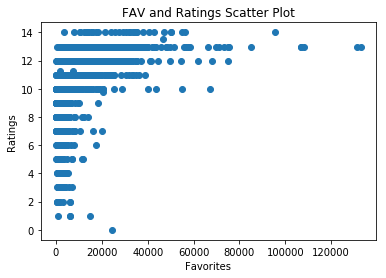

In [156]:
plt.scatter(df['favorite_count'], df['rating_numerator'])
plt.xlabel('Favorites')
plt.ylabel('Ratings')
plt.title('FAV and Ratings Scatter Plot')

The above scatter plot shows that the frequencies of favorites are high when the rating is also high.

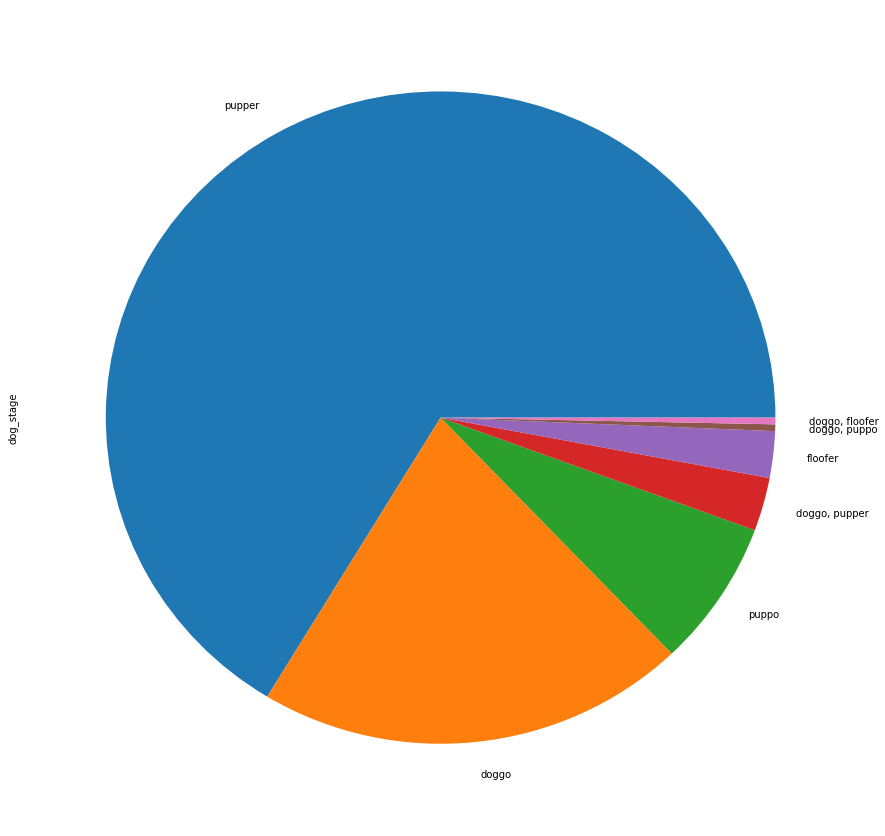

In [162]:
df['dog_stage'].value_counts().plot(kind='pie', figsize=(15,15))

The above pie chart shows that the majority of tweets is concerned with the pupper stage of dogs.

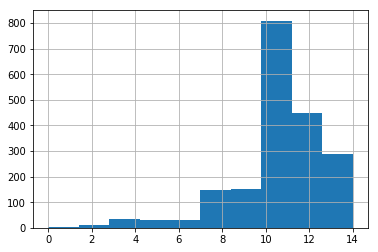

In [158]:
df['rating_numerator'].hist()

The histogram shows that the distribution is skewed to the left meaning that people tend to give high scores for dogs in general.

Text(0.5,1,'Retweets Vs Favorites')

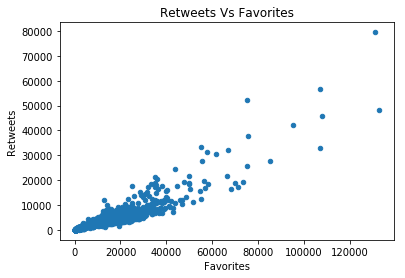

In [159]:
df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets Vs Favorites')

Not all favorited tweets are retweeted.There is a clear linear relationship between the two variables.

In [160]:
df.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
tweet_id,1.000000,0.537054,NaN,0.408362,0.657249,0.103995,0.121065,-0.001723,0.126180,-0.046672,0.097656
rating_numerator,0.537054,1.000000,NaN,0.312199,0.418245,0.102997,0.291527,0.005552,0.250771,-0.028366,0.232061
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.408362,0.312199,NaN,1.000000,0.913182,0.055848,0.009500,-0.019241,0.015038,-0.045215,0.012217
favorite_count,0.657249,0.418245,NaN,0.913182,1.000000,0.079702,0.054800,-0.022610,0.059931,-0.053522,0.042330
p1_conf,0.103995,0.102997,NaN,0.055848,0.079702,1.000000,0.124663,-0.510622,0.142231,-0.709427,0.117049
p1_dog,0.121065,0.291527,NaN,0.009500,0.054800,0.124663,1.000000,0.110053,0.637505,0.049500,0.559709
p2_conf,-0.001723,0.005552,NaN,-0.019241,-0.022610,-0.510622,0.110053,1.000000,0.095875,0.478952,0.064493
p2_dog,0.126180,0.250771,NaN,0.015038,0.059931,0.142231,0.637505,0.095875,1.000000,0.030149,0.558774
p3_conf,-0.046672,-0.028366,NaN,-0.045215,-0.053522,-0.709427,0.049500,0.478952,0.030149,1.000000,0.035841


There is a strong positive correlation between favorite count and retweet counts with coefficient of 0.913182 and the correlation between retweets, favorites with the numerator ranking is weak.